<a href="https://colab.research.google.com/github/OmkarDeshpande7/GoogleColab/blob/master/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          CN  Thickness  UCSZ  UCSH   MA  ECSZ    BN   BC   NN  Mitoses  Class
0  1002945.0        5.0   4.0   4.0  5.0   7.0  10.0  3.0  2.0      1.0    0.0
1  1015425.0        3.0   1.0   1.0  1.0   2.0   2.0  3.0  1.0      1.0    0.0
2  1016277.0        6.0   8.0   8.0  1.0   3.0   4.0  3.0  7.0      1.0    0.0
3  1017023.0        4.0   1.0   1.0  3.0   2.0   1.0  3.0  1.0      1.0    0.0
4  1017122.0        8.0  10.0  10.0  8.0   7.0  10.0  9.0  7.0      1.0    1.0
Train Features Size: (558, 10)
Test Features Size: (140, 10)
Train Labels Size: (558,)
Test Labels Size: (140,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
________________________________________________________________

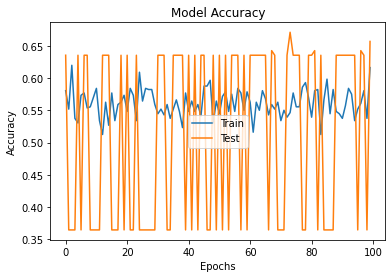

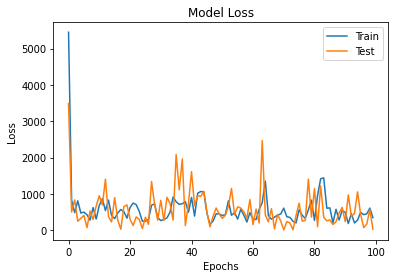

Model Accracy: 65.71428571428571 %
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79        89
         1.0       1.00      0.06      0.11        51

    accuracy                           0.66       140
   macro avg       0.82      0.53      0.45       140
weighted avg       0.78      0.66      0.54       140



In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

def NN_model(learning_rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(16, input_dim=10, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



column_names = ['CN', 'Thickness', 'UCSZ', 'UCSH', 'MA', 'ECSZ', 'BN', 'BC', 'NN', 'Mitoses', 'Class']
dataset = pd.read_csv(r'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',dtype=np.float64,na_values={'?'})
df = pd.DataFrame(dataset)
df.columns = column_names
for name in column_names:
    df[name].fillna(df[name].mean(skipna=True))
    df[name].replace(to_replace=np.nan,value=df[name].mean(skipna=True),inplace=True)
df['Class'].replace(to_replace=2,value=0,inplace=True)
df['Class'].replace(to_replace=4,value=1,inplace=True)
print(df.head())
Y = df.Class.values
X = df.drop(['Class'], axis=1)
# print(Y[:5])
# print(X.head())
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check dimensions of both sets.
print("Train Features Size:", X_train.shape)
print("Test Features Size:", X_test.shape)
print("Train Labels Size:", Y_train.shape)
print("Test Labels Size:", Y_test.shape)


learning_rate = 0.01
model = NN_model(learning_rate)
print(model.summary())

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

# Plot the Loss function vs. number of Epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()


predictions = np.argmax(model.predict(X_test), axis=1)
model_accuracy = accuracy_score(Y_test, predictions)*100
print("Model Accracy:", model_accuracy,"%")
print(classification_report(Y_test, predictions))